## Observations and Insights 

In [281]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])
               
# Display the data table for preview
merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [282]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()

249

In [283]:
# Checking the total number of rows.
merged_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [284]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_df = merged_df[merged_df[['Mouse ID', 'Timepoint']].duplicated() == True]
dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


## Optional: Get all the data for the duplicate mouse ID. 

In [285]:
## Optional: All data for the duplicate mouse.
merged_df[merged_df['Mouse ID'] == 'g989']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [286]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#    $ Mouse ID g989 is the only mouse with duplicate data
#        * 3 of its 13 records are not duplicates and can be assumed to be valid
#        * However, 10 of its records (5 pairs) have diplicate Timepoints
#             - These pairs have different Tumor Volumes and Metastatic Sites
#             - It's impossible to know which row of each pair has valid data
#        * We need a full set of 8 valid, non-duplicated Timepoint rows for each mouse
#    $ Therefore, we must drop all data rows for the Mouse with ID g989


# Index the rows with the "dirty" mouse
i = merged_df[(merged_df["Mouse ID"] == 'g989')].index

# Drop the indexed rows, then create and display a clean data set
clean_df = merged_df.drop(i)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [287]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [288]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

grouped_regimen_df = clean_df.groupby(['Drug Regimen'])
# grouped_regimen_df.count().head(10)
grouped_regimen_df.agg(
    {
        "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"],
    })

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [380]:
# Generate a summary statistics table of tumor volume for each regimen
#   - mean
#   - median
#   - variance
#   - standard deviation
#   - SEM
#
# Use the aggregation method to:
#   - produce the same summary statistics
#   - in a single line

group2_regimen_df = clean_df.groupby(['Drug Regimen'])
# grouped_regimen_df.count().head(10)
group2_regimen_df.agg(
[{f" clean_df['Drug Regimen'], "-mean-", clean_df['Tumor Volume (mm3)'].mean()}, 
{f" clean_df['Drug Regimen'], "-median-", clean_df['Tumor Volume (mm3)'].median()}, 
{f" clean_df['Drug Regimen'], "-variance-", clean_df['Tumor Volume (mm3)'].var()}, 
{f" clean_df['Drug Regimen'], "-standard deviation-", clean_df['Tumor Volume (mm3)'].std()}, 
{f" clean_df['Drug Regimen'], "-SEM-", clean_df['Tumor Volume (mm3)'].sem()}, 
])

# i = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

# For i == merged_df["Drug Regimen"]
#   print(i,["Tumor Volume (mm3)"].mean())
#   print(i,["Tumor Volume (mm3)"].median())
#   print(i,["Tumor Volume (mm3)"].var()" ")
#   print(i,["Tumor Volume (mm3)"].std()" ")
#   print(i,["Tumor Volume (mm3)"].sem()" ")
# Next i

######## NEED TO CALCULATE STRAIGHT LINE SUMMARY STATISTICS ###########

SyntaxError: EOL while scanning string literal (<ipython-input-380-f082deadb56f>, line 15)

## Bar and Pie Charts

Text(0, 0.5, 'Measurements Taken')

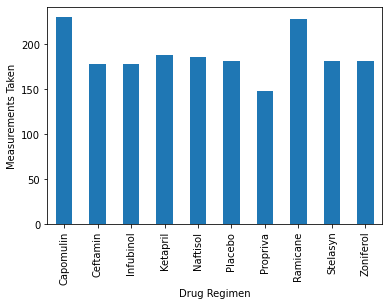

In [290]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
one_df = grouped_regimen_df["Timepoint"].count()
one_df

one_df.plot.bar(x='Drug Regimen', y='Timepoint', rot=90)
plt.ylabel("Measurements Taken")


Text(0, 0.5, 'Measurements Taken')

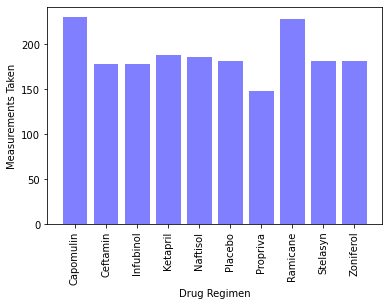

In [291]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

users = one_df
x_axis = np.arange(len(users))

plt.bar(x_axis, users, color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ceftamin", "Infubinol", 
                            "Ketapril", "Naftisol", "Placebo", "Propriva", 
                            "Ramicane", "Stelasyn", "Zoniferol"], rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Measurements Taken")

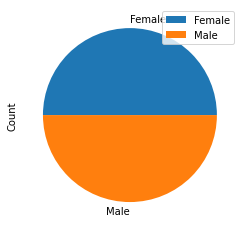

In [292]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# The values of each section of the pie chart
male_df = clean_df[clean_df["Sex"] == 'Male']
males = male_df["Mouse ID"].nunique()

female_df = clean_df[clean_df["Sex"] == 'Female']
females = female_df["Mouse ID"].nunique()

gender_df = pd.DataFrame({
    "Sex": ["Male", "Female"],
    "Count": [males, females],
})

gender_df.groupby(['Sex']).count().plot(kind='pie', y= 'Count')

([<matplotlib.patches.Wedge at 0x25d23e39be0>,
 [Text(-0.696335501700647, -0.8515379434125696, 'Male'),
  Text(0.6963355017006471, 0.8515379434125695, 'Female')],
 [Text(-0.3798193645639892, -0.46447524186140154, '50.4%'),
  Text(0.37981936456398924, 0.46447524186140143, '49.6%')])

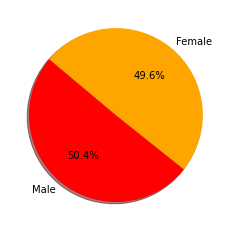

In [293]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
male_df = clean_df[clean_df["Sex"] == 'Male']
males = male_df["Mouse ID"].nunique()

female_df = clean_df[clean_df["Sex"] == 'Female']
females = female_df["Mouse ID"].nunique()

sizes = [males, females]

# The colors of each section of the pie chart
colors = ["red", "orange"]
                   
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [294]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = clean_df[clean_df["Timepoint"] == 45 ]

# limit the last timepoint dataframe to the 4 chosen drug regimens
four_drugs_df = last_timepoint_df[last_timepoint_df["Drug Regimen"].isin
(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
                                                                   
# Merge this group df (four_drugs_df) with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(clean_df, four_drugs_df, on=("Tumor Volume (mm3)"), how="inner")
merge_df.count()

Mouse ID_x            63
Drug Regimen_x        63
Sex_x                 63
Age_months_x          63
Weight (g)_x          63
Timepoint_x           63
Tumor Volume (mm3)    63
Metastatic Sites_x    63
Mouse ID_y            63
Drug Regimen_y        63
Sex_y                 63
Age_months_y          63
Weight (g)_y          63
Timepoint_y           63
Metastatic Sites_y    63
dtype: int64

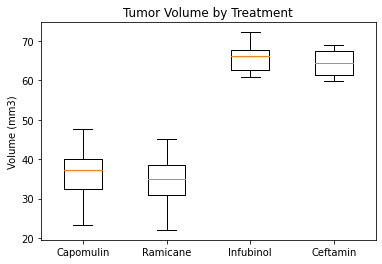

In [418]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
drugs = [capvol, ramvol, infvol, cefvol] 

# Generate a box plot for the final timepoint mouse tumor volumes for all four treatments combined
# labels = "Capomulin", "Ramicane", "Infubinol", "Ceftamin"}
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Treatment')
ax1.set_ylabel('Volume (mm3)')
ax1.boxplot(drugs)
# ax.set_xticklabels("Capomulin", "Ramicane", "Infubinol", "Ceftamin")
ax1.set_xticklabels(labels, ha='center')
plt.show()

In [ ]:
# PART 1 of 2: Calculate the IQR and quantitatively determine if there are any potential outliers.

lowerq = merge_df["Tumor Volume (mm3)"].quantile(0.25)
upperq = merge_df["Tumor Volume (mm3)"].quantile(0.75)
iqr = upperq-lowerq
medq = merge_df["Tumor Volume (mm3)"].quantile(0.5)

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {medq}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")      

In [ ]:
# Determine outliers using upper and lower bounds for all 4 regimens:
#     Capomulin, Ramicane, Infubinol, and Ceftamin

# PART 2 of 2: Calculate the IQR and quantitatively determine if there are any potential outliers
#     - There are no values above 105.135493215 
#     - There are no values below -9.513252184999999
#     - Therefore, there are NO OUTLIERS

In [414]:
# Locate the rows which contain mice on each drug and get the tumor volumes
Capomulin_df = merge_df[merge_df["Drug Regimen_x"] == 'Capomulin'] 
Ramicane_df  = merge_df[merge_df["Drug Regimen_x"] == 'Ramicane']
Infubinol_df = merge_df[merge_df["Drug Regimen_x"] == 'Infubinol']
Ceftamin_df  = merge_df[merge_df["Drug Regimen_x"] == 'Ceftamin']    
    
# add subset 
capvol = Capomulin_df["Tumor Volume (mm3)"]
ramvol = Ramicane_df["Tumor Volume (mm3)"]
infvol = Infubinol_df["Tumor Volume (mm3)"]
cefvol = Ceftamin_df["Tumor Volume (mm3)"]

## Line and Scatter Plots

Text(0, 0.5, 'Volume (mm3)')

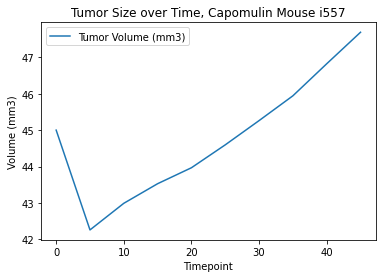

In [365]:
# Generate a line plot of tumor volume vs. time point for a mouse (Mouse ID = i557) treated with Capomulin

# Create a data frame for the line plot
mouse_df = clean_df[clean_df["Mouse ID"] == 'i557']

# Remove unnecessary columns
del mouse_df['Age_months']
del mouse_df['Weight (g)']
del mouse_df['Metastatic Sites']
del mouse_df['Mouse ID']
del mouse_df['Drug Regimen']
del mouse_df['Sex']

# set 'Timepoint' as the index
# mouse_df = mouse_df.drop((mouse_df['Timepoint'] < 0.5).index)
mouse_df.set_index('Timepoint', inplace=True)

# Plot the line
lines = mouse_df.plot.line()
plt.title("Tumor Size over Time, Capomulin Mouse i557")
plt.ylabel("Volume (mm3)")

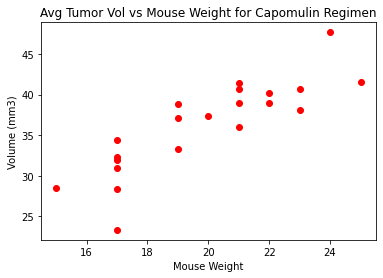

In [364]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Create the data frame consisting of just the last timepoints in the Capomulin regimen
CapLast_df = last_timepoint_df
CapLast_df
tumor_df = CapLast_df[CapLast_df["Drug Regimen"] == 'Capomulin']

# Remove unnecessary columns
del tumor_df['Age_months']
del tumor_df['Mouse ID']
del tumor_df['Drug Regimen']
del tumor_df['Sex']
del tumor_df['Timepoint']
del tumor_df['Metastatic Sites']

# Define the scatter plot variables
x_axis = tumor_df['Weight (g)']
tumor = tumor_df['Tumor Volume (mm3)']

# Display the plot title and the axis labels
plt.title("Avg Tumor Vol vs Mouse Weight for Capomulin Regimen")
plt.xlabel("Mouse Weight")
plt.ylabel("Volume (mm3)")

# Display the scatter plot
plt.scatter(x_axis, tumor, marker="o", color="red")
# plt.show()

## Correlation and Regression

The correlation between both factors is 0.85
The correlation between both factors is 0.85


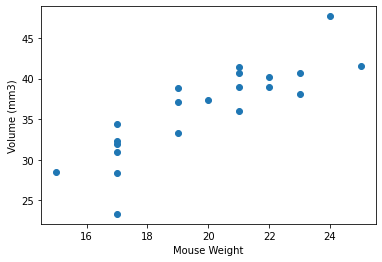

In [413]:
# Create a data frame for the line plot

Corr_df = last_timepoint_df[last_timepoint_df["Drug Regimen"] == 'Capomulin']

# Calculate the correlation coefficient and linear regression model 

weight = Corr_df.iloc[:,4]
volume = Corr_df.iloc[:,6]

correlation = st.pearsonr(weight,volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(weight,volume)
plt.xlabel('Mouse Weight')
plt.ylabel('Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()